# 3 Training a model to recognize sentiment in text

### **Data source**

- testing dataset Instruction: https://rishabhmisra.github.io/publications/
- Downloadable dataset on Kaggle: https://www.kaggle.com/datasets/rmisra/news-headlines-dataset-for-sarcasm-detection
- In the workspace: `.../TensorFlow_Zero2Hero/TF_NLP_Zero2Hero/Datasets/Sarcasm_Headlines_Dataset.json`

### **Data Structure**

Example: 

```json
{
    "article_link": "https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5", 
    "headline": "former versace store clerk sues over secret 'black code' for minority shoppers", 
    "is_sarcastic": 0
}
```

In [2]:
# to load the json file to 3 python list

import os
import json

jsonfile = os.path.join(os.getcwd() + '\Datasets\Sarcasm_Headlines_Dataset.json')
print(jsonfile)

with open(jsonfile, 'r') as f:
    datastore = json.load(f)
    
print(f)


C:\Users\xia12237.AVWORLD\My_Github_Repos\TensorFlow_Zero2Hero\TF_NLP_Zero2Hero\Datasets\Sarcasm_Headlines_Dataset.json
<_io.TextIOWrapper name='C:\\Users\\xia12237.AVWORLD\\My_Github_Repos\\TensorFlow_Zero2Hero\\TF_NLP_Zero2Hero\\Datasets\\Sarcasm_Headlines_Dataset.json' mode='r' encoding='cp1252'>


>Note:
the original file needs to be adjusted in format. Added "," at the end of each line and added the "[]" to include all the lines.

In [3]:
sentences = []
labels = []
urls = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])
    urls.append(item['article_link'])

In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)
world_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, padding='post')

print(padded[0])      # an example of tokenized sentence
print(padded.shape)   # 26709 sequences, each with 40 tokens

[  308 15115   679  3337  2298    48   382  2576 15116     6  2577  8434
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0]
(26709, 40)


In [11]:
# Splitting the dataset to training and testing

training_size = 20000

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]

training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [18]:
# New codes to let the model only see the traning dataset, rather than the testing dataset

vocab_size = 10000
oov_tok = "<OOV>"
max_length = 100
padding_type = 'post'
trunc_type = 'post'

tokenizer = Tokenizer(num_words=vocab_size,   # the maximum number of words to keep, based on word frequency. Only the most common num_words-1 words will be kept.
                      oov_token=oov_tok)      # if given, it will be added to word_index and used to replace out-of-vocabulary words during text_to_sequence calls

tokenizer.fit_on_texts(training_sentences)    

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)

training_padded = pad_sequences(training_sequences,      # List of sequences (each sequence is a list of integers).
                                maxlen=max_length,       # Optional Int, maximum length of all sequences. If not provided, sequences will be padded to the length of the longest individual sequence.
                                padding=padding_type,    # Pad either before or after each sequence. pre=default
                                truncating=trunc_type    # Remove values from sequences larger than maxlen, either at the beginning or at the end of the sequences.
                               )

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)

testing_padded = pad_sequences(testing_sequences, 
                               maxlen=max_length, 
                               padding=padding_type, 
                               truncating=trunc_type
                              )

Word Embedding:

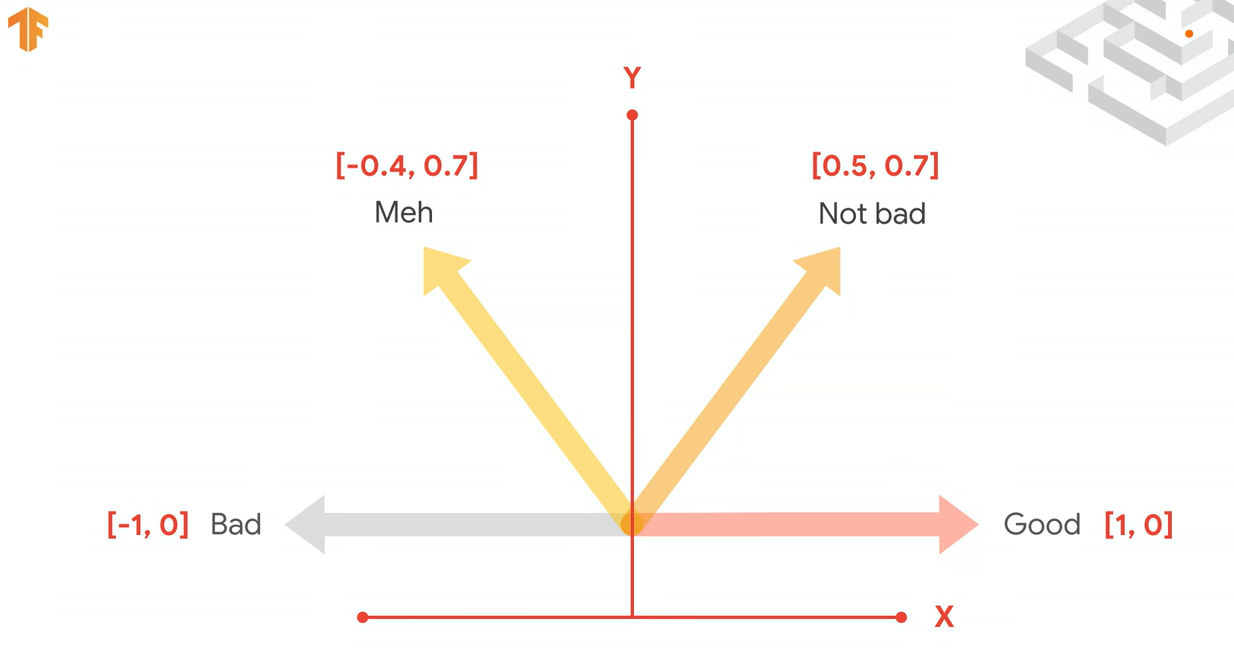

In [19]:
# Starting neural netwrok coding
import tensorflow as tf

embedding_dim = 16


model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size,              # Size of vocabulary
                              output_dim=embedding_dim,           # Dimension of the dense embedding
                              input_length=max_length
                             ),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d_3 ( (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Needs to convert to array to work with TF 2.0
# If missing this block, will encounter ValueError
## ValueError: 
#### Failed to find data adapter that can handle input: <class 'numpy.ndarray'>, 
#### (<class 'list'> containing values of types {"<class 'int'>"})

import numpy as np

training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [23]:
# Training Model

num_epochs = 30

history = model.fit(x=training_padded, 
                    y=training_labels, 
                    epochs=num_epochs,
                    validation_data=(testing_padded, testing_labels), 
                    verbose=2   # 0 = silent, 1 = progress bar, 2 = one line per epoch.
                    )


Epoch 1/30
625/625 - 1s - loss: 0.6662 - accuracy: 0.5864 - val_loss: 0.5887 - val_accuracy: 0.6994
Epoch 2/30
625/625 - 1s - loss: 0.4357 - accuracy: 0.8282 - val_loss: 0.3827 - val_accuracy: 0.8407
Epoch 3/30
625/625 - 1s - loss: 0.3088 - accuracy: 0.8759 - val_loss: 0.3505 - val_accuracy: 0.8541
Epoch 4/30
625/625 - 1s - loss: 0.2560 - accuracy: 0.8985 - val_loss: 0.3460 - val_accuracy: 0.8514
Epoch 5/30
625/625 - 1s - loss: 0.2201 - accuracy: 0.9143 - val_loss: 0.3476 - val_accuracy: 0.8514
Epoch 6/30
625/625 - 1s - loss: 0.1935 - accuracy: 0.9268 - val_loss: 0.3558 - val_accuracy: 0.8517
Epoch 7/30
625/625 - 1s - loss: 0.1727 - accuracy: 0.9336 - val_loss: 0.3629 - val_accuracy: 0.8548
Epoch 8/30
625/625 - 1s - loss: 0.1530 - accuracy: 0.9435 - val_loss: 0.3897 - val_accuracy: 0.8472
Epoch 9/30
625/625 - 1s - loss: 0.1382 - accuracy: 0.9510 - val_loss: 0.3984 - val_accuracy: 0.8523
Epoch 10/30
625/625 - 1s - loss: 0.1246 - accuracy: 0.9566 - val_loss: 0.4209 - val_accuracy: 0.8493

In [26]:
sentence = [
    "granny starting to faer spiders in the garden might be real",
    "the weather today is bright and sunny"]
    
sequences = tokenizer.texts_to_sequences(sentence)

padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(model.predict(padded))

[[9.9474931e-01]
 [1.2375672e-05]]
